<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/ode5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations
# Chapter 5: Solutions to exercises

<a href="https://samyzaf.com/technion/ode/ode.pdf">
<img src="https://samyzaf.com/technion/ode/ode2.jpg" alt="ode book cover"/>
</a>

* We used Python **Sympy** package for obtaining the final
  result for most of the exercises.
* This package is still under development, and is not yet
  ready to cope with all ode's.
  * Manual solutions are provided to some of the problems that cannot be
    solved by the program. A link to a PDF solution is provided.
* The new site https://mathdf.com seems to be a great source
  for obtaining full step-by-step solutions.
  Please use it for obtaining full solutions and let us know
  if it meets expectations. We will be glad to receive full solutions
  and add them here later (sz@samyzaf.com).
* This notebook can be edited and executed by clicking
  the **open in colab** button.
* These are only a small number of solutions.
  Hopefully this will encourage students to try to solve more
  exercises with similar methods. We will be glad to accept notebooks
  with solutions to other exercises in this book.
  Please send them to sz@samyzaf.com.

In [ ]:
%pip install --upgrade sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [ ]:
from sympy import *
from sympy.solvers.ode import checkodesol
from IPython.display import HTML

# Exercise 5.1.1

$(1+x^2)y'' + x^3y = 0$

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((1+x**2)*y(x).diff(x,x) - x**3 * y(x) , 0)
classify_ode(de)

('2nd_power_series_ordinary',)

In [ ]:
Y = dsolve(de, hint="2nd_power_series_ordinary")
display(Y)

Eq(y(x), -3*x**5*r(3)/10 + C2*(-x**7/42 + x**5/20 + 1) + C1*x*(x**5/30 + 1) + O(x**6))

* This is not a mathematically rigorous solution to our equation.
* But it gives us a first impression and may help us with verifying a manual solution.
* The follwing example shows us how to specify a length for the pwoer series ($n=11$),
  and adjoin initial conditions to our differential equation.

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((1+x**2) * y(x).diff(x,x) + x**3 * y(x) , 0)
Y = dsolve(de, x0=0, simplify=False, n=11) #, ics={y(0): 3, y(x).diff(x).subs(x,0): 12}, hint='2nd_power_series_ordinary')
display(Y)

Eq(y(x), -3*x**5*r(3)/10 - 2*x**6*r(4)/5 + x**7*r(3)/7 + 3*x**8*r(4)/14 - x**8*r(3)/56 - x**9*r(4)/72 - x**9*r(3)/12 - 2*x**10*r(4)/15 + 13*x**10*r(3)/900 + C2*(x**12/132 + x**11/3300 - x**10/90 + x**8/56 - x**6/30 + x) + C1*(-31*x**12/55440 + x**11/110 + x**10/1800 - x**9/72 + x**7/42 - x**5/20 + 1) + O(x**11))

In [ ]:
def y1(x,n=19):
    r = 1
    for k in range(2,n//2 + 1):
        r = r - (-1)**k/((2*k+1)*2*k) * x**(2*k+1)
    return r

In [ ]:
y1(3.99, 123)

5.200998338804285e+69

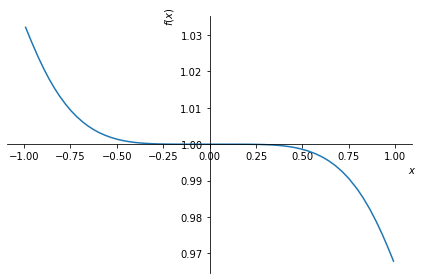

In [ ]:
plot(y1(x), (x,-0.99,0.99))

# Exercise 5.1.2

$
y'' - 2x^2y' + 4xy = x^2+2x+2
$

$
y(0) = 3
$

$
y'(0) = 12
$

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq(y(x).diff(x,x) - 2*x**2 * y(x).diff(x) + 4*x*y(x) , x**2 + 2*x +2)
#Y = dsolve(de, x0=0, simplify=False, n=9, ics={y(0): 3, y(x).diff(x).subs(x,0): 12}, hint='2nd_power_series_ordinary')
#display(Y)

* Sympy 1.11.1 fails to give anything for this problem.

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.1.2.pdf)

# Exercise 5.1.3

$
(1-x^2)y'' - 2xy' + 2y = 0
$

$
y(0) = 1
$

$
y'(0) = 0
$

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((1 - x**2) * y(x).diff(x,x) - 2*x*y(x).diff(x) + 2*y(x) , 0)
Y = dsolve(de, x0=0, simplify=False, n=15, ics={y(0): 1, y(x).diff(x).subs(x,0): 0}, hint='2nd_power_series_ordinary')
display(Y)

Eq(y(x), C2*x + C1*(-x**12/11 - x**10/9 - x**8/7 - x**6/5 - x**4/3 - x**2 + 1) + O(x**15))

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.1.3.pdf)

# Exercise 5.1.4

$
(x^2+4)y'' + xy = x+2
$

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((x**2 + 4) * y(x).diff(x,x) + x*y(x) , x+2)
#Y = dsolve(de, x0=0, simplify=False)
#display(Y)

# Exercise 5.1.7
let $y(x) = \sum_{n=0}^{\infty} a_n x^n$ be a power series solution of

$
(10-x^3)y'' + 5xy = 0
$

$
y(0) = 1
$

$
y'(0) = 1
$

Calculate $a_3$, $a_4$, $a_5$.

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((10 - x**3) * y(x).diff(x,x) + 5*x*y(x) , 0)
Y = dsolve(de, x0=0, simplify=False, n=11, ics={y(0): 1, y(x).diff(x).subs(x,0): 1}, hint='2nd_power_series_ordinary')
display(Y)

Eq(y(x), C2*(-37*x**10/1296000 - x**7/1440 - x**4/24 + x) + C1*(-x**9/103680 - x**6/3600 - x**3/12 + 1) + O(x**11))

* For some reason Sympy 1.11.1 does not use the initial conditions $C_1=C_2=0$.
* Easy to see that $a_3= -\frac{1}{12}$, $a_4 = -\frac{1}{24}$, $a_5=0$.
* A full solution follows:
### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.1.7.pdf)

# Exercise 5.1.8
Find $y(x) = \sum_{n=0}^{\infty} a_n x^n$ a power series solution of

$
(x^2 - 2x)y'' -2y = 0
$

$
y(1) = 0
$

$
y'(1) = -1
$

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq((x**2 - 2*x) * y(x).diff(x,x) - 2*y(x) , 0)
Y = dsolve(de, x0=1, simplify=False, n=11, ics={y(1): 0, y(x).diff(x).subs(x,1): -1}, hint='2nd_power_series_ordinary')
display(Y)

Eq(y(x), C2*(x - (x - 1)**9/63 - (x - 1)**7/35 - (x - 1)**5/15 - (x - 1)**3/3 - 1) + C1*(1 - (x - 1)**2) + O(x**11))

* This is the general solution.
* The particular solution is in the following link.

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.1.8.pdf)

# Exercise 5.2
Given the differential equation

$
y'' -xy' + 5y = x+1
$

<ol type="a">
<li>
Find a power series solution $y(x) = \sum_{n=0}^{\infty} a_n x^n$
<li>
Find a particular solution $y(0)=0$, $y'(0)=3$
</ol>

In [ ]:
x = symbols("x", real=True)
y = symbols("y", cls=Function)
de = Eq(y(x).diff(x,x) - x * y(x).diff(x) + 5*y(x) , x+1)
#Y = dsolve(de, x0=0, simplify=False, n=11, hint='2nd_power_series_ordinary')
#Y = dsolve(de, x0=0, simplify=False, n=11, ics={y(0): 1, y(x).diff(x).subs(x,0): 1}, hint='2nd_power_series_ordinary')
#display(Y)

* Sympy 1.11.1 cannot solve this problem ... :-(
* Here is a link to a manual solution:

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.1.8.pdf)

# Exercise 5.9
let $y(x) = \sum_{n=0}^{\infty} a_n x^n$ be a power series solution of

$
y'' - 2xy' + my = 0
$

$
y(0) = 0
$

$
y'(0) = 1
$

Find all values of $m$ for which $y(x)$ is a polynom of finite degree,
and the degree of such polynom.

In [ ]:
x, m = symbols("x m", real=True)
y = symbols("y", cls=Function)
de = Eq(y(x).diff(x,x) - 2*x*y(x).diff(x) + m*y(x) , 0)
Y = dsolve(de, x0=0, simplify=False, n=11, ics={y(0): 0, y(x).diff(x).subs(x,0): 1}, hint='2nd_power_series_ordinary')
display(Y)

Eq(y(x), C2*(m**4*x**9/362880 - m**3*x**9/11340 - m**3*x**7/5040 + 43*m**2*x**9/45360 + m**2*x**7/280 + m**2*x**5/120 - 11*m*x**9/2835 - 23*m*x**7/1260 - m*x**5/15 - m*x**3/6 + x**9/216 + x**7/42 + x**5/10 + x**3/3 + x) + C1*(m**4*x**8/40320 - m**3*x**8/1680 - m**3*x**6/720 + 11*m**2*x**8/2520 + m**2*x**6/60 + m**2*x**4/24 - m*x**8/105 - 2*m*x**6/45 - m*x**4/6 - m*x**2/2 + 1) + O(x**11))

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap5.9.pdf)

# **TO BE CONTINUED ...**
* Any student with a basic Python programming skill
  is welcome to continue and solve more exercises
  from the <a href="https://samyzaf.com/technion/ode/ode.pdf">
  Ordinal Differential Equations book
</a>

* Send your solutions notebook to sz@samyzaf.com.
* They will be checked and added to this notebook.
* Thanks!!!